In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score , classification_report, confusion_matrix

from sklearn.preprocessing import StandardScaler

In [3]:
df = pd.read_csv('../data/heart_2020_cleaned.csv')
df

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,Yes,27.41,Yes,No,No,7.0,0.0,Yes,Male,60-64,Hispanic,Yes,No,Fair,6.0,Yes,No,No
319791,No,29.84,Yes,No,No,0.0,0.0,No,Male,35-39,Hispanic,No,Yes,Very good,5.0,Yes,No,No
319792,No,24.24,No,No,No,0.0,0.0,No,Female,45-49,Hispanic,No,Yes,Good,6.0,No,No,No
319793,No,32.81,No,No,No,0.0,0.0,No,Female,25-29,Hispanic,No,No,Good,12.0,No,No,No


In [4]:
# Kiểm tra dữ liệu thiếu
print(df.isnull().sum())

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64


In [5]:
# 2. Chuẩn bị dữ liệu
X = df[['BMI', 'PhysicalHealth']]  # Có thể thêm các đặc trưng khác nếu cần
y = df['HeartDisease']

# 3. Chia dữ liệu
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Chuẩn hóa dữ liệu
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [6]:
# 5. Tìm k tối ưu
k_range = range(1, 31)
k_scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train_scaled, y_train, cv=5, scoring='accuracy')
    k_scores.append(scores.mean())

optimal_k = k_range[k_scores.index(max(k_scores))]
print(f"Giá trị k tối ưu: {optimal_k}")

Giá trị k tối ưu: 30


In [7]:
# 6. Huấn luyện mô hình với k tối ưu
knn = KNeighborsClassifier(n_neighbors=optimal_k)
knn.fit(X_train_scaled, y_train)

# 7. Dự đoán
y_pred = knn.predict(X_test_scaled)

# 8. Đánh giá mô hình
accuracy = accuracy_score(y_test, y_pred)
print(f"Độ chính xác: {accuracy:.4f}")


Độ chính xác: 0.9126


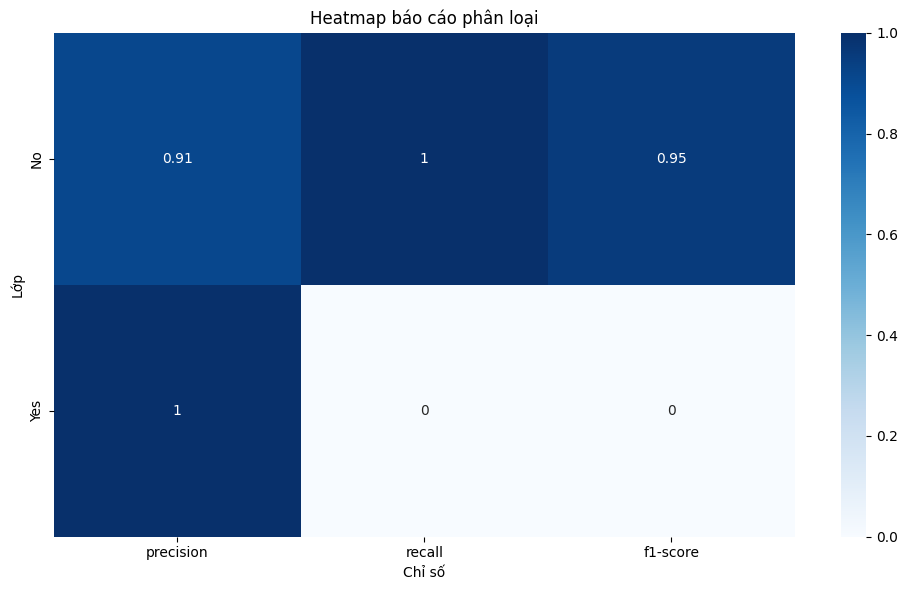

In [8]:
# Tạo báo cáo phân loại dưới dạng dictionary
report = classification_report(y_test, y_pred, output_dict=True, zero_division=1)

# Chuyển đổi báo cáo thành DataFrame
df_report = pd.DataFrame(report).transpose()

# Loại bỏ hàng 'accuracy', 'macro avg', và 'weighted avg' nếu bạn chỉ muốn hiển thị thông tin cho từng lớp
df_report = df_report.drop(['accuracy', 'macro avg', 'weighted avg'], errors='ignore')

# Vẽ heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df_report[['precision', 'recall', 'f1-score']], annot=True, cmap='Blues')
plt.title('Heatmap báo cáo phân loại')
plt.xlabel('Chỉ số')
plt.ylabel('Lớp')
plt.tight_layout()
plt.show()

**Nhận xét**: 

* Lớp "No":
    - Từ biểu đồ, chúng ta có thể nhận thấy các chỉ số có khả năng đánh giá tốt mô hình như Precision của lớp "No" ở mức khá cao là không mắc bệnh, thể hiển cho việc khả năng của mô hình trong việc xác định đúng các mẫu không mắc bệnh tim là rất tốt.
    - Bên cạnh đó, ở giá trị recall đặt giá trị tuyệt đối ở lớp "No" nhưng so với precision ở cùng lớp rằng cho thấy được mô hình có khả năng phát hiện tốt các mẫu không mắc bệnh tim nhưng có một số dự đoán sai.
    - Từ đó cho thấy được sự cân bằng tốt giữa precision và recall, cho biết mô hình có hiệu suất tốt trong việc phân loại các mẫu thuộc lớp "No"

* Lớp "Yes":
    - Với chỉ số dự đoán độ chính xác cao về tất cả các mẫu được dự đoán là "mắc bệnh" đều đúng , nhưng giá trị recall bằng 0 thì lại cho thấy rằng mô hình không thể phát hiện đúng các trường hợp mắc bệnh là quan trọng. Từ đó mà tỷ lệ cân bằng giữa 2 chỉ số trước đó của lớp này cũng bằng 0.

=> Từ đó cho thấy được mô hình có sự cân bằng tốt để dự đoán chính xác khả năng phát hiện cho các mẫu không mắc bênh tim trên tập dữ liệu thông qua sự cân bằng tốt của 2 chỉ số là Precision và recall được thể hiện qua chỉ số F1-score ở lớp "No" đạt giá trị cao. Tuy nhiên mô hình lại gặp khó khăn trong việc phân loại các mẫu thuộc lớp "Yes"


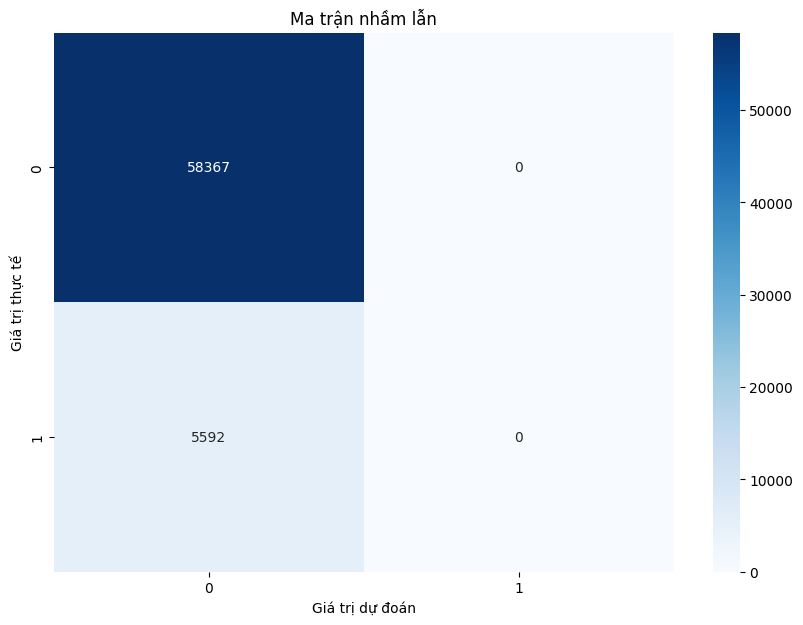

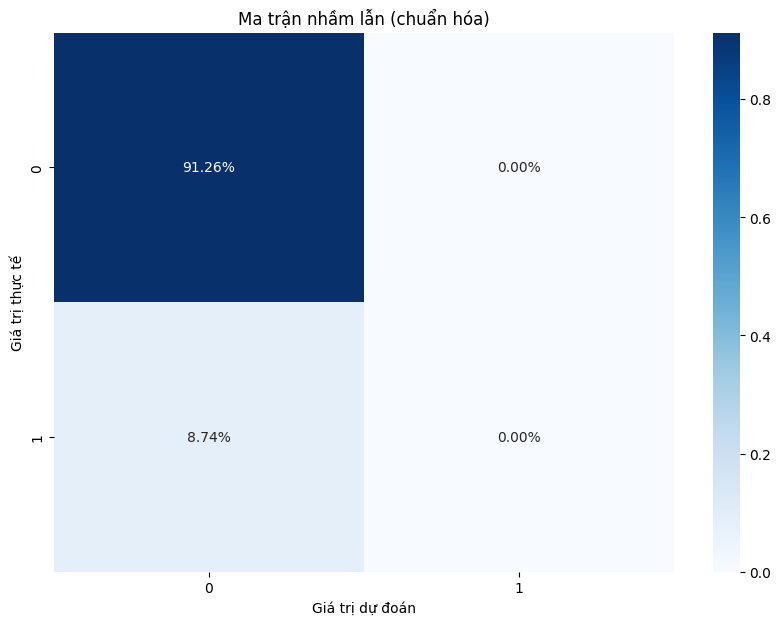

In [9]:
# Ma trận nhầm lẫn
cm = confusion_matrix(y_test, y_pred)

# Vẽ biểu đồ heatmap cho ma trận nhầm lẫn
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Ma trận nhầm lẫn')
plt.ylabel('Giá trị thực tế')
plt.xlabel('Giá trị dự đoán')
plt.show()

# Vẽ biểu đồ chuẩn hóa
plt.figure(figsize=(10,7))
sns.heatmap(cm/np.sum(cm), annot=True, fmt='.2%', cmap='Blues')
plt.title('Ma trận nhầm lẫn (chuẩn hóa)')
plt.ylabel('Giá trị thực tế')
plt.xlabel('Giá trị dự đoán')
plt.show()

**Nhận xét**:

- Số trường hợp cũng như tỷ lệ mà mô hình dự đoán đúng là không mắc bệnh tim ở lớp "0" là quá lớn . Thể hiện rằng mô hình hoạt động tốt trong việc nhận diện các mẫu không mắc bệnh. Đồng thời, có 5592 trường hợp thực sự mắc bệnh tim nhưng mô hình lại dự đoán là không không mắc bệnh . Đây là một lượng âm tính giả (False Nagatives) đáng kể, và điều này có thể gây nguy hiểm vì mô hình đã bỏ sót khá nhiều số trường hợp mắc bệnh.

- Bên cạnh đó, biều đồ không có giá trị nào cho dự đoán là mắc bệnh ở lớp "1", tức là tất cả các trường hợp dự đoán đều nằm ở lớp "0" là không mắc bệnh

=> Mô hình hiện tại đang bị mất cân bằng nghiêm trọng, vì nó chỉ dự đoán được lớp không mắc bệnh mà không có khả năng phát hiện lớp mắc bệnh, với tỷ lệ bỏ sót khá cao là 8.74% cho thấy mô hình không hoạt động tốt trong việc phát hiện các trường hợp mắc bệnh tim, trong đó số lượng mẫu không mắc bệnh chiếm ưu thế hơn so với số lượng mẫu mắc bệnh.


Độ chính xác trung bình qua cross-validation: 0.9144 (+/- 0.0001)


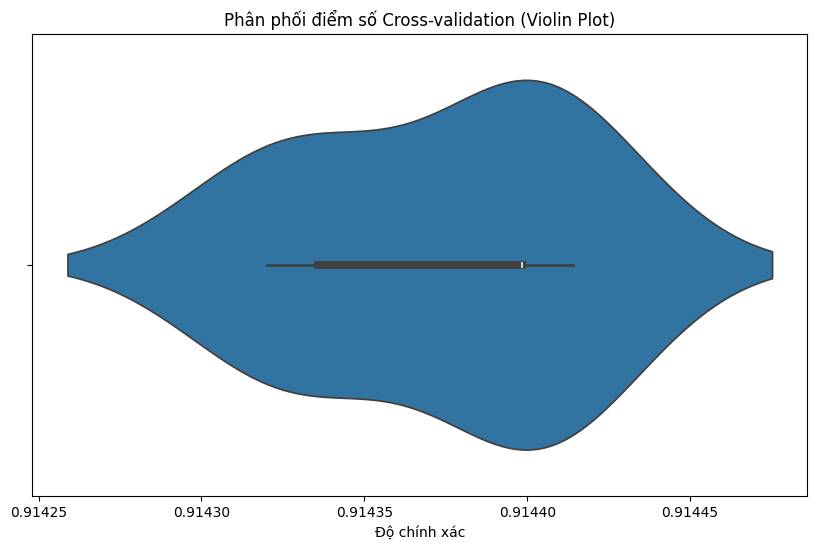

In [10]:
cv_scores = cross_val_score(knn, X, y, cv=5)
print(f"\nĐộ chính xác trung bình qua cross-validation: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")


# Vẽ biểu đồ violin plot
plt.figure(figsize=(10, 6))
sns.violinplot(x=cv_scores)
plt.title('Phân phối điểm số Cross-validation (Violin Plot)')
plt.xlabel('Độ chính xác')
plt.show()


**Nhận xét**:

- Hiệu suất mô hình:
  - Mô hình KNN đang hoạt động rất tốt trên tập dữ liệu này với độ chính xác trung bình là 0.9144 (91.44%). Đây là một kết quả rất cao, cho thấy mô hình có khả năng phân loại chính xác các trường hợp mắc bệnh và không mắc bệnh tim.

- Độ ổn định của mô hình:
  - Độ lệch chuẩn của các điểm số cross-validation là 0.0001, cho thấy các điểm số cross-validation dao động trong khoảng ±0.01% so với độ chính xác trung bình. Điều này cho thấy mô hình có hiệu suất rất ổn định qua các lần cross-validation và không quá nhạy cảm với sự thay đổi nhỏ trong tập dữ liệu được huấn luyện. Với độ hiển thị phân phối của các điểm số cross-validation. Biểu đồ có hình dạng hẹp và tập trung quanh giá trị 0.9144, điều đó cho thấy các điểm số cross-validation ít biến động và mô hình đang có hiệu suất ổn định.

- Bên cạnh đó: 
  - Các thuộc tính và đặc trưng thói quen như BMI, hút thuốc, uống rượu, đột quỵ, sức khỏe thể chất, sức khỏe tinh thần, khó khăn khi đi bộ, giới tính, nhóm tuổi, chủng tộc, bệnh tiểu đường, hoạt động thể chất, sức khỏe tổng quát, thời gian ngủ, hen suyễn, bệnh thận, và ung thư da đều có ảnh hưởng đến nguy cơ mắc bệnh tim.
  - Với độ chính xác trung bình cao và độ lệch chuẩn thấp, mô hình KNN có khả năng tổng quát hóa tốt trên các tập dữ liệu khác nhau. Điều này có nghĩa là mô hình có thể áp dụng cho các tập dữ liệu mới và vẫn duy trì được hiệu suất cao.

**Kết luận**:

=> Dựa trên các kết quả từ biểu đồ Violin Plot và các chỉ số cross-validation, mô hình KNN đang hoạt động rất tốt trong việc dự đoán nguy cơ mắc bệnh tim dựa trên các thói quen hàng ngày của mỗi người. Mô hình có độ chính xác trung bình cao (91.44%) và độ ổn định tốt , cho thấy khả năng phân loại chính xác và tổng quát hóa tốt, và hiệu suất của mô hình cũng như các yếu tố nguy cơ liên quan đến bệnh tim, từ đó đưa ra các biện pháp phòng ngừa và điều trị phù hợp.

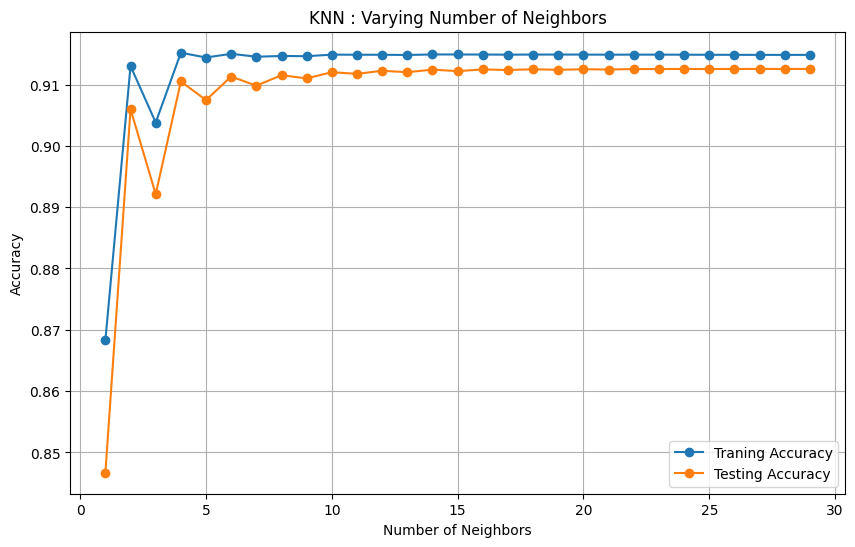

In [12]:
k_values = list(range(1, 30))

train_accuracies = []
test_accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_train_pred = knn.predict(X_train)
    y_test_pred = knn.predict(X_test)
    train_accuracies.append(accuracy_score(y_train, y_train_pred))
    test_accuracies.append(accuracy_score(y_test, y_test_pred))
                           
plt.figure(figsize=(10 ,6))
plt.title("KNN : Varying Number of Neighbors")
plt.plot(k_values,train_accuracies, label="Traning Accuracy", marker='o')
plt.plot(k_values,test_accuracies, label="Testing Accuracy", marker='o')
plt.legend()
plt.xlabel("Number of Neighbors")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()

**Nhận xét**:

- Độ chính xác trên tập huấn luyện:

    - Tăng dần: Khi số lượng neighbors tăng, độ chính xác trên tập huấn luyện cũng tăng dần và đạt mức ổn định ở khoảng k = 5. Điều này cho thấy mô hình ngày càng "học thuộc lòng" dữ liệu huấn luyện khi k tăng.
 
- Độ chính xác trên tập kiểm thử:

    - Tăng ban đầu, sau đó giảm: Độ chính xác trên tập kiểm thử tăng ban đầu khi k tăng từ 1 đến khoảng 5, đạt đỉnh ở khoảng này. Tuy nhiên, khi k tiếp tục tăng, độ chính xác trên tập kiểm thử lại giảm dần.

- Overfitting:

    - Khi k quá nhỏ (ví dụ k = 1), mô hình dễ bị overfitting, tức là mô hình học quá kỹ dữ liệu huấn luyện đến mức không thể generalize tốt trên dữ liệu mới (tập kiểm thử). Điều này dẫn đến độ chính xác trên tập huấn luyện cao nhưng độ chính xác trên tập kiểm thử lại thấp.
    - Ngược lại, khi k quá lớn, mô hình trở nên quá đơn giản, không thể bắt được các pattern phức tạp trong dữ liệu. Điều này dẫn đến cả độ chính xác trên tập huấn luyện và tập kiểm thử đều thấp.

**Kết luận**:

- Giá trị k tối ưu: Dựa trên biểu đồ, giá trị k tối ưu bắt đầu từ khoảng 5-7,Tuy nhiên, đến khoảng k = 30, mô hình hoàn toàn không còn thay đổi, tại đây, nó cho ra kết quả chính xác trên tập kiểm thử đạt mức cao nhất và mô hình có khả năng tổng quát hóa tốt nhất.
- Hiện tượng overfitting và underfitting: Biểu đồ minh họa rõ ràng hiện tượng overfitting và underfitting khi thay đổi giá trị k.
- Cân bằng giữa độ phức tạp của mô hình và khả năng tổng quát hóa: Việc chọn giá trị k phù hợp là một trade-off giữa độ phức tạp của mô hình và khả năng tổng quát hóa. Một mô hình quá phức tạp dễ bị overfitting, trong khi một mô hình quá đơn giản lại không thể bắt được các pattern phức tạp trong dữ liệu.